# Demo del Algoritmo Random Forest

Este notebook presenta una demostración completa del algoritmo Random Forest, explicando sus hiperparámetros principales y cómo afectan al rendimiento del modelo.

## ¿Qué es Random Forest?

Random Forest es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para crear un modelo más robusto y preciso. Es un método de **ensemble learning** que utiliza la técnica de **bagging** (Bootstrap Aggregating).

### Ventajas de Random Forest:
- Reduce el overfitting
- Maneja bien datos faltantes
- Proporciona importancia de características
- Es robusto a outliers
- Funciona bien con datos categóricos y numéricos


## Hiperparámetros Principales de Random Forest

### 1. **n_estimators** (número de árboles)
- **Qué hace**: Define cuántos árboles de decisión se crearán en el bosque
- **Valor por defecto**: 100
- **Efecto**: Más árboles generalmente mejoran la precisión pero aumentan el tiempo de entrenamiento

### 2. **max_depth** (profundidad máxima)
- **Qué hace**: Controla la profundidad máxima de cada árbol
- **Valor por defecto**: None (sin límite)
- **Efecto**: Limita el crecimiento del árbol para evitar overfitting

### 3. **min_samples_split** (mínimo de muestras para dividir)
- **Qué hace**: Número mínimo de muestras requeridas para dividir un nodo interno
- **Valor por defecto**: 2
- **Efecto**: Valores más altos previenen overfitting

### 4. **min_samples_leaf** (mínimo de muestras en hoja)
- **Qué hace**: Número mínimo de muestras requeridas en un nodo hoja
- **Valor por defecto**: 1
- **Efecto**: Valores más altos suavizan el modelo

### 5. **max_features** (características máximas)
- **Qué hace**: Número de características a considerar al buscar la mejor división
- **Valores comunes**: 'sqrt', 'log2', None, o un número específico
- **Efecto**: Controla la aleatoriedad y puede reducir overfitting

### 6. **bootstrap** (muestreo con reemplazo)
- **Qué hace**: Si usar muestreo bootstrap al construir árboles
- **Valor por defecto**: True
- **Efecto**: True permite diversidad entre árboles


In [1]:
# Importar las librerías necesarias
import numpy as np  # Para operaciones numéricas y arrays
import pandas as pd  # Para manipulación de datos estructurados
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import seaborn as sns  # Para gráficos estadísticos más avanzados
from sklearn.datasets import make_classification  # Para generar datos sintéticos de clasificación
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier  # El algoritmo Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas de evaluación
from sklearn.metrics import precision_score, recall_score, f1_score  # Métricas adicionales

# Configurar el estilo de los gráficos para que se vean mejor
plt.style.use('seaborn-v0_8')  # Usar estilo seaborn para gráficos más atractivos
sns.set_palette("husl")  # Configurar paleta de colores para los gráficos

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


In [2]:
# Generar un dataset sintético para la demostración
# make_classification crea un dataset de clasificación con características controladas
X, y = make_classification(
    n_samples=1000,  # Número total de muestras (filas)
    n_features=10,   # Número de características (columnas)
    n_informative=8, # Número de características informativas (que realmente ayudan a clasificar)
    n_redundant=2,   # Número de características redundantes (correlacionadas con las informativas)
    n_classes=3,     # Número de clases diferentes
    random_state=42  # Semilla para reproducibilidad
)

# Convertir a DataFrame para mejor visualización
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['target'] = y  # Agregar la variable objetivo

print("📊 Información del Dataset:")
print(f"Forma del dataset: {X.shape}")
print(f"Número de clases: {len(np.unique(y))}")
print(f"Distribución de clases: {np.bincount(y)}")
print("\n🔍 Primeras 5 filas del dataset:")
print(df.head())


📊 Información del Dataset:
Forma del dataset: (1000, 10)
Número de clases: 3
Distribución de clases: [334 333 333]

🔍 Primeras 5 filas del dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   2.635789  -6.259407   1.335343  -0.188664   1.432129   0.623095   
1   0.357621   3.556534  -1.956725  -0.880727   0.632876  -0.639079   
2   1.853692  -3.723211   0.307588   1.655535   1.993431   0.819204   
3  -1.048988   0.493165   0.216318  -4.616391  -3.999150  -3.886870   
4  -2.089758   2.712542  -4.125210   2.337657   3.370167  -4.097354   

   Feature_7  Feature_8  Feature_9  Feature_10  target  
0  -1.625289  -3.286777   0.181854   -0.005083       2  
1   2.995170   1.247317   2.411797   -1.735048       1  
2  -1.330146  -1.354409   1.197189   -1.498869       1  
3   1.177697   0.925327  -2.461494    1.800938       1  
4   4.401355   3.225830   1.007868   -0.094696       2  


In [3]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
# train_test_split separa los datos de manera aleatoria pero reproducible
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                    # Datos de entrada y salida
    test_size=0.2,           # 20% de los datos para prueba, 80% para entrenamiento
    random_state=42,         # Semilla para reproducibilidad
    stratify=y               # Mantener la proporción de clases en ambos conjuntos
)

print("📈 División de datos:")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"Proporción entrenamiento/prueba: {X_train.shape[0]/X_test.shape[0]:.1f}:1")

# Verificar que la distribución de clases se mantiene
print(f"\nDistribución de clases en entrenamiento: {np.bincount(y_train)}")
print(f"Distribución de clases en prueba: {np.bincount(y_test)}")


📈 División de datos:
Conjunto de entrenamiento: 800 muestras
Conjunto de prueba: 200 muestras
Proporción entrenamiento/prueba: 4.0:1

Distribución de clases en entrenamiento: [267 266 267]
Distribución de clases en prueba: [67 67 66]


## Demostración de Hiperparámetros

Ahora vamos a entrenar diferentes modelos Random Forest con diferentes configuraciones de hiperparámetros para ver cómo afectan al rendimiento del modelo.


In [4]:
# Modelo 1: Random Forest con parámetros por defecto
print("🌲 Modelo 1: Random Forest con parámetros por defecto")
print("=" * 50)

# Crear el modelo con parámetros por defecto
rf_default = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_default.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_default = rf_default.predict(X_test)

# Calcular métricas de rendimiento
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='weighted')
recall_default = recall_score(y_test, y_pred_default, average='weighted')
f1_default = f1_score(y_test, y_pred_default, average='weighted')

print(f"📊 Métricas del modelo por defecto:")
print(f"   Accuracy: {accuracy_default:.4f}")
print(f"   Precision: {precision_default:.4f}")
print(f"   Recall: {recall_default:.4f}")
print(f"   F1-Score: {f1_default:.4f}")

# Mostrar los parámetros utilizados
print(f"\n⚙️ Parámetros utilizados:")
print(f"   n_estimators: {rf_default.n_estimators}")
print(f"   max_depth: {rf_default.max_depth}")
print(f"   min_samples_split: {rf_default.min_samples_split}")
print(f"   min_samples_leaf: {rf_default.min_samples_leaf}")
print(f"   max_features: {rf_default.max_features}")
print(f"   bootstrap: {rf_default.bootstrap}")


🌲 Modelo 1: Random Forest con parámetros por defecto
📊 Métricas del modelo por defecto:
   Accuracy: 0.8650
   Precision: 0.8700
   Recall: 0.8650
   F1-Score: 0.8636

⚙️ Parámetros utilizados:
   n_estimators: 100
   max_depth: None
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt
   bootstrap: True


In [5]:
# Modelo 2: Random Forest con más árboles (n_estimators)
print("\n🌲 Modelo 2: Random Forest con más árboles (n_estimators=200)")
print("=" * 50)

# Crear el modelo con más árboles
rf_more_trees = RandomForestClassifier(
    n_estimators=200,  # Aumentar de 100 a 200 árboles
    random_state=42
)

# Entrenar el modelo
rf_more_trees.fit(X_train, y_train)

# Hacer predicciones
y_pred_more_trees = rf_more_trees.predict(X_test)

# Calcular métricas
accuracy_more_trees = accuracy_score(y_test, y_pred_more_trees)
precision_more_trees = precision_score(y_test, y_pred_more_trees, average='weighted')
recall_more_trees = recall_score(y_test, y_pred_more_trees, average='weighted')
f1_more_trees = f1_score(y_test, y_pred_more_trees, average='weighted')

print(f"📊 Métricas del modelo con más árboles:")
print(f"   Accuracy: {accuracy_more_trees:.4f}")
print(f"   Precision: {precision_more_trees:.4f}")
print(f"   Recall: {recall_more_trees:.4f}")
print(f"   F1-Score: {f1_more_trees:.4f}")

print(f"\n⚙️ Parámetros utilizados:")
print(f"   n_estimators: {rf_more_trees.n_estimators}")
print(f"   max_depth: {rf_more_trees.max_depth}")
print(f"   min_samples_split: {rf_more_trees.min_samples_split}")
print(f"   min_samples_leaf: {rf_more_trees.min_samples_leaf}")
print(f"   max_features: {rf_more_trees.max_features}")
print(f"   bootstrap: {rf_more_trees.bootstrap}")

# Comparar con el modelo anterior
print(f"\n📈 Comparación con modelo por defecto:")
print(f"   Mejora en Accuracy: {accuracy_more_trees - accuracy_default:.4f}")
print(f"   Mejora en F1-Score: {f1_more_trees - f1_default:.4f}")



🌲 Modelo 2: Random Forest con más árboles (n_estimators=200)
📊 Métricas del modelo con más árboles:
   Accuracy: 0.8750
   Precision: 0.8775
   Recall: 0.8750
   F1-Score: 0.8736

⚙️ Parámetros utilizados:
   n_estimators: 200
   max_depth: None
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt
   bootstrap: True

📈 Comparación con modelo por defecto:
   Mejora en Accuracy: 0.0100
   Mejora en F1-Score: 0.0100


In [6]:
# Modelo 3: Random Forest con profundidad limitada (max_depth)
print("\n🌲 Modelo 3: Random Forest con profundidad limitada (max_depth=5)")
print("=" * 50)

# Crear el modelo con profundidad limitada
rf_limited_depth = RandomForestClassifier(
    n_estimators=100,     # Mantener 100 árboles
    max_depth=5,          # Limitar la profundidad máxima a 5 niveles
    random_state=42
)

# Entrenar el modelo
rf_limited_depth.fit(X_train, y_train)

# Hacer predicciones
y_pred_limited_depth = rf_limited_depth.predict(X_test)

# Calcular métricas
accuracy_limited_depth = accuracy_score(y_test, y_pred_limited_depth)
precision_limited_depth = precision_score(y_test, y_pred_limited_depth, average='weighted')
recall_limited_depth = recall_score(y_test, y_pred_limited_depth, average='weighted')
f1_limited_depth = f1_score(y_test, y_pred_limited_depth, average='weighted')

print(f"📊 Métricas del modelo con profundidad limitada:")
print(f"   Accuracy: {accuracy_limited_depth:.4f}")
print(f"   Precision: {precision_limited_depth:.4f}")
print(f"   Recall: {recall_limited_depth:.4f}")
print(f"   F1-Score: {f1_limited_depth:.4f}")

print(f"\n⚙️ Parámetros utilizados:")
print(f"   n_estimators: {rf_limited_depth.n_estimators}")
print(f"   max_depth: {rf_limited_depth.max_depth}")
print(f"   min_samples_split: {rf_limited_depth.min_samples_split}")
print(f"   min_samples_leaf: {rf_limited_depth.min_samples_leaf}")
print(f"   max_features: {rf_limited_depth.max_features}")
print(f"   bootstrap: {rf_limited_depth.bootstrap}")

# Comparar con el modelo por defecto
print(f"\n📈 Comparación con modelo por defecto:")
print(f"   Cambio en Accuracy: {accuracy_limited_depth - accuracy_default:.4f}")
print(f"   Cambio en F1-Score: {f1_limited_depth - f1_default:.4f}")

print(f"\n💡 Interpretación:")
print(f"   Limitar la profundidad puede prevenir overfitting")
print(f"   pero también puede reducir la capacidad del modelo")



🌲 Modelo 3: Random Forest con profundidad limitada (max_depth=5)
📊 Métricas del modelo con profundidad limitada:
   Accuracy: 0.8200
   Precision: 0.8298
   Recall: 0.8200
   F1-Score: 0.8183

⚙️ Parámetros utilizados:
   n_estimators: 100
   max_depth: 5
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt
   bootstrap: True

📈 Comparación con modelo por defecto:
   Cambio en Accuracy: -0.0450
   Cambio en F1-Score: -0.0453

💡 Interpretación:
   Limitar la profundidad puede prevenir overfitting
   pero también puede reducir la capacidad del modelo


In [7]:
# Modelo 4: Random Forest con parámetros más restrictivos
print("\n🌲 Modelo 4: Random Forest con parámetros más restrictivos")
print("=" * 50)

# Crear el modelo con parámetros más restrictivos para prevenir overfitting
rf_restrictive = RandomForestClassifier(
    n_estimators=100,           # 100 árboles
    max_depth=3,                # Profundidad muy limitada
    min_samples_split=10,       # Requerir al menos 10 muestras para dividir
    min_samples_leaf=5,         # Requerir al menos 5 muestras en cada hoja
    max_features='sqrt',        # Usar solo sqrt(n_features) características por división
    random_state=42
)

# Entrenar el modelo
rf_restrictive.fit(X_train, y_train)

# Hacer predicciones
y_pred_restrictive = rf_restrictive.predict(X_test)

# Calcular métricas
accuracy_restrictive = accuracy_score(y_test, y_pred_restrictive)
precision_restrictive = precision_score(y_test, y_pred_restrictive, average='weighted')
recall_restrictive = recall_score(y_test, y_pred_restrictive, average='weighted')
f1_restrictive = f1_score(y_test, y_pred_restrictive, average='weighted')

print(f"📊 Métricas del modelo restrictivo:")
print(f"   Accuracy: {accuracy_restrictive:.4f}")
print(f"   Precision: {precision_restrictive:.4f}")
print(f"   Recall: {recall_restrictive:.4f}")
print(f"   F1-Score: {f1_restrictive:.4f}")

print(f"\n⚙️ Parámetros utilizados:")
print(f"   n_estimators: {rf_restrictive.n_estimators}")
print(f"   max_depth: {rf_restrictive.max_depth}")
print(f"   min_samples_split: {rf_restrictive.min_samples_split}")
print(f"   min_samples_leaf: {rf_restrictive.min_samples_leaf}")
print(f"   max_features: {rf_restrictive.max_features}")
print(f"   bootstrap: {rf_restrictive.bootstrap}")

# Comparar con el modelo por defecto
print(f"\n📈 Comparación con modelo por defecto:")
print(f"   Cambio en Accuracy: {accuracy_restrictive - accuracy_default:.4f}")
print(f"   Cambio en F1-Score: {f1_restrictive - f1_default:.4f}")

print(f"\n💡 Interpretación:")
print(f"   Parámetros restrictivos previenen overfitting")
print(f"   pero pueden hacer el modelo demasiado simple")



🌲 Modelo 4: Random Forest con parámetros más restrictivos
📊 Métricas del modelo restrictivo:
   Accuracy: 0.7700
   Precision: 0.7831
   Recall: 0.7700
   F1-Score: 0.7700

⚙️ Parámetros utilizados:
   n_estimators: 100
   max_depth: 3
   min_samples_split: 10
   min_samples_leaf: 5
   max_features: sqrt
   bootstrap: True

📈 Comparación con modelo por defecto:
   Cambio en Accuracy: -0.0950
   Cambio en F1-Score: -0.0937

💡 Interpretación:
   Parámetros restrictivos previenen overfitting
   pero pueden hacer el modelo demasiado simple


In [8]:
# Resumen comparativo de todos los modelos
print("📊 RESUMEN COMPARATIVO DE TODOS LOS MODELOS")
print("=" * 60)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Modelo': ['Por Defecto', 'Más Árboles', 'Profundidad Limitada', 'Restrictivo'],
    'Accuracy': [accuracy_default, accuracy_more_trees, accuracy_limited_depth, accuracy_restrictive],
    'Precision': [precision_default, precision_more_trees, precision_limited_depth, precision_restrictive],
    'Recall': [recall_default, recall_more_trees, recall_limited_depth, recall_restrictive],
    'F1-Score': [f1_default, f1_more_trees, f1_limited_depth, f1_restrictive]
})

# Mostrar el DataFrame con formato
print(results.round(4))

# Encontrar el mejor modelo
best_model_idx = results['F1-Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Modelo']
best_f1_score = results.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 Mejor modelo: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")

print(f"\n📈 Análisis de resultados:")
print(f"   • Más árboles pueden mejorar la precisión")
print(f"   • Limitar profundidad puede prevenir overfitting")
print(f"   • Parámetros restrictivos pueden ser demasiado conservadores")
print(f"   • El equilibrio entre complejidad y generalización es clave")


📊 RESUMEN COMPARATIVO DE TODOS LOS MODELOS
                 Modelo  Accuracy  Precision  Recall  F1-Score
0           Por Defecto     0.865     0.8700   0.865    0.8636
1           Más Árboles     0.875     0.8775   0.875    0.8736
2  Profundidad Limitada     0.820     0.8298   0.820    0.8183
3           Restrictivo     0.770     0.7831   0.770    0.7700

🏆 Mejor modelo: Más Árboles
   F1-Score: 0.8736

📈 Análisis de resultados:
   • Más árboles pueden mejorar la precisión
   • Limitar profundidad puede prevenir overfitting
   • Parámetros restrictivos pueden ser demasiado conservadores
   • El equilibrio entre complejidad y generalización es clave


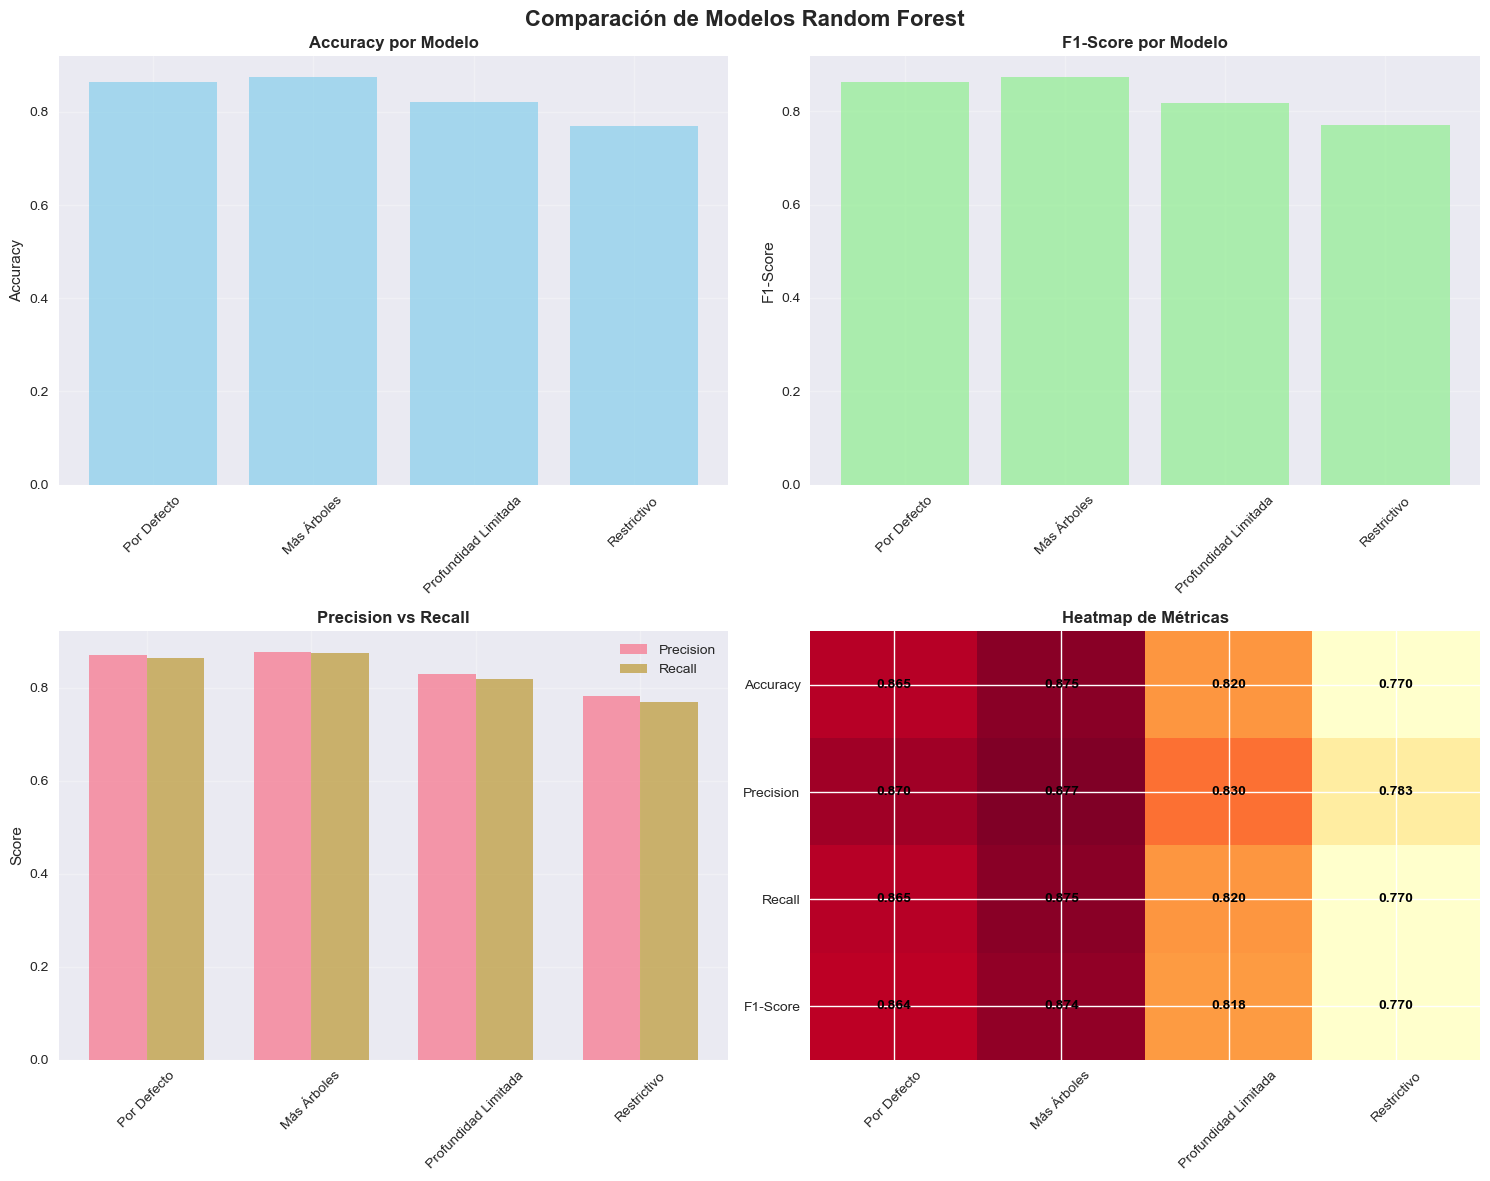

In [9]:
# Visualización de los resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Crear una figura con 4 subplots
fig.suptitle('Comparación de Modelos Random Forest', fontsize=16, fontweight='bold')

# Gráfico 1: Comparación de Accuracy
axes[0, 0].bar(results['Modelo'], results['Accuracy'], color='skyblue', alpha=0.7)
axes[0, 0].set_title('Accuracy por Modelo', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
axes[0, 0].grid(True, alpha=0.3)  # Agregar cuadrícula sutil

# Gráfico 2: Comparación de F1-Score
axes[0, 1].bar(results['Modelo'], results['F1-Score'], color='lightgreen', alpha=0.7)
axes[0, 1].set_title('F1-Score por Modelo', fontweight='bold')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Comparación de Precision y Recall
x_pos = np.arange(len(results['Modelo']))  # Posiciones en el eje x
width = 0.35  # Ancho de las barras

axes[1, 0].bar(x_pos - width/2, results['Precision'], width, label='Precision', alpha=0.7)
axes[1, 0].bar(x_pos + width/2, results['Recall'], width, label='Recall', alpha=0.7)
axes[1, 0].set_title('Precision vs Recall', fontweight='bold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(results['Modelo'], rotation=45)
axes[1, 0].legend()  # Mostrar leyenda
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Heatmap de todas las métricas
metrics_data = results[['Accuracy', 'Precision', 'Recall', 'F1-Score']].T  # Transponer para el heatmap
im = axes[1, 1].imshow(metrics_data.values, cmap='YlOrRd', aspect='auto')
axes[1, 1].set_title('Heatmap de Métricas', fontweight='bold')
axes[1, 1].set_xticks(range(len(results['Modelo'])))
axes[1, 1].set_xticklabels(results['Modelo'], rotation=45)
axes[1, 1].set_yticks(range(len(metrics_data.index)))
axes[1, 1].set_yticklabels(metrics_data.index)

# Agregar valores numéricos en el heatmap
for i in range(len(metrics_data.index)):
    for j in range(len(results['Modelo'])):
        text = axes[1, 1].text(j, i, f'{metrics_data.iloc[i, j]:.3f}',
                              ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar el gráfico


🔍 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
📊 Importancia de características (ordenadas por importancia):
      Feature  Importance
2   Feature_3      0.2056
3   Feature_4      0.1118
8   Feature_9      0.1107
5   Feature_6      0.1069
9  Feature_10      0.0964
6   Feature_7      0.0921
4   Feature_5      0.0812
7   Feature_8      0.0720
0   Feature_1      0.0716
1   Feature_2      0.0518


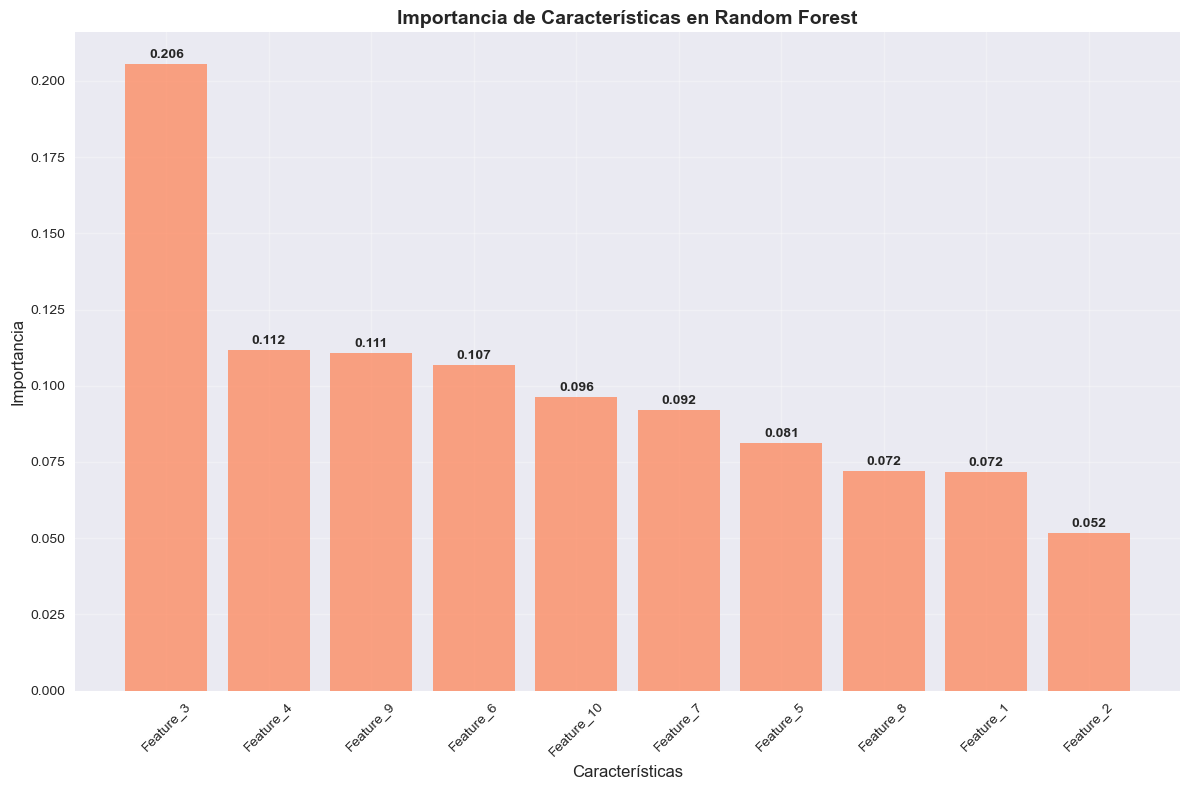


💡 Interpretación:
   • Las características con mayor importancia contribuyen más a las predicciones
   • Feature_3 es la más importante
   • Las características con baja importancia podrían ser eliminadas


In [10]:
# Análisis de importancia de características
print("🔍 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("=" * 50)

# Usar el mejor modelo para analizar la importancia de características
best_model = rf_more_trees  # Usar el modelo con más árboles como ejemplo

# Obtener la importancia de características
feature_importance = best_model.feature_importances_

# Crear un DataFrame con la importancia de características
feature_names = [f'Feature_{i+1}' for i in range(len(feature_importance))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)  # Ordenar por importancia descendente

print("📊 Importancia de características (ordenadas por importancia):")
print(importance_df.round(4))

# Visualizar la importancia de características
plt.figure(figsize=(12, 8))  # Crear una nueva figura con tamaño específico
bars = plt.bar(range(len(importance_df)), importance_df['Importance'], 
               color='coral', alpha=0.7)  # Crear barras con color coral
plt.title('Importancia de Características en Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Características', fontsize=12)
plt.ylabel('Importancia', fontsize=12)
plt.xticks(range(len(importance_df)), importance_df['Feature'], rotation=45)  # Etiquetas del eje x
plt.grid(True, alpha=0.3)  # Agregar cuadrícula

# Agregar valores numéricos en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()  # Ajustar el espaciado
plt.show()  # Mostrar el gráfico

print(f"\n💡 Interpretación:")
print(f"   • Las características con mayor importancia contribuyen más a las predicciones")
print(f"   • Feature_{importance_df.iloc[0]['Feature'].split('_')[1]} es la más importante")
print(f"   • Las características con baja importancia podrían ser eliminadas")


📊 MATRIZ DE CONFUSIÓN DEL MEJOR MODELO


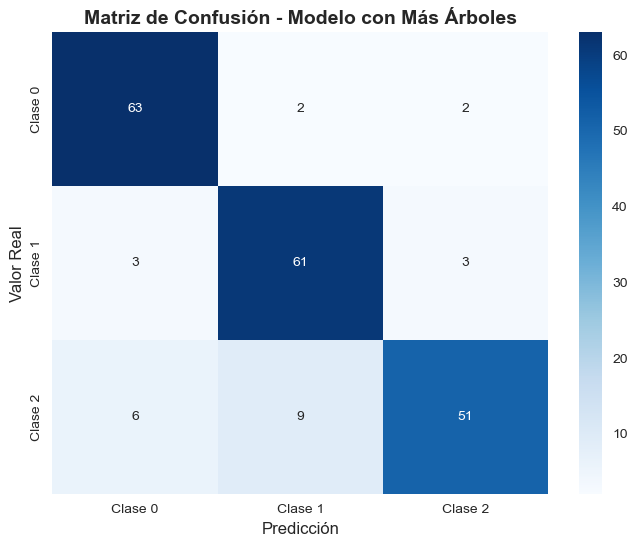


📋 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

     Clase 0       0.88      0.94      0.91        67
     Clase 1       0.85      0.91      0.88        67
     Clase 2       0.91      0.77      0.84        66

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200


🔍 Análisis de la Matriz de Confusión:
   • Total de predicciones correctas: 175
   • Total de predicciones: 200
   • Accuracy calculada: 0.8750
   • Clase 0: Precision=0.875, Recall=0.940, F1=0.906
   • Clase 1: Precision=0.847, Recall=0.910, F1=0.878
   • Clase 2: Precision=0.911, Recall=0.773, F1=0.836


In [11]:
# Matriz de confusión para el mejor modelo
print("📊 MATRIZ DE CONFUSIÓN DEL MEJOR MODELO")
print("=" * 50)

# Calcular la matriz de confusión para el mejor modelo
cm = confusion_matrix(y_test, y_pred_more_trees)

# Crear visualización de la matriz de confusión
plt.figure(figsize=(8, 6))  # Crear figura con tamaño específico
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Crear heatmap con anotaciones
            xticklabels=[f'Clase {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Clase {i}' for i in range(len(np.unique(y)))])
plt.title('Matriz de Confusión - Modelo con Más Árboles', fontsize=14, fontweight='bold')
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.show()  # Mostrar el gráfico

# Mostrar reporte de clasificación detallado
print("\n📋 Reporte de Clasificación Detallado:")
print(classification_report(y_test, y_pred_more_trees, 
                          target_names=[f'Clase {i}' for i in range(len(np.unique(y)))]))

# Análisis de la matriz de confusión
print(f"\n🔍 Análisis de la Matriz de Confusión:")
print(f"   • Total de predicciones correctas: {np.trace(cm)}")
print(f"   • Total de predicciones: {np.sum(cm)}")
print(f"   • Accuracy calculada: {np.trace(cm) / np.sum(cm):.4f}")

# Calcular precision, recall y F1 para cada clase
for i in range(len(np.unique(y))):
    tp = cm[i, i]  # Verdaderos positivos
    fp = cm[:, i].sum() - tp  # Falsos positivos
    fn = cm[i, :].sum() - tp  # Falsos negativos
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"   • Clase {i}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")


## Conclusiones y Recomendaciones

### 📊 Resumen de la Demostración

En esta demostración hemos visto cómo diferentes hiperparámetros afectan el rendimiento del algoritmo Random Forest:

1. **n_estimators**: Más árboles generalmente mejoran la precisión pero aumentan el tiempo de entrenamiento
2. **max_depth**: Limitar la profundidad previene overfitting pero puede reducir la capacidad del modelo
3. **min_samples_split/min_samples_leaf**: Parámetros restrictivos previenen overfitting pero pueden hacer el modelo demasiado simple
4. **max_features**: Controla la aleatoriedad y puede mejorar la generalización

### 🎯 Recomendaciones Prácticas

#### Para Datasets Pequeños:
- Usar `max_depth` limitado (3-5)
- Aumentar `min_samples_split` y `min_samples_leaf`
- Usar `max_features='sqrt'` o `max_features='log2'`

#### Para Datasets Grandes:
- Usar más árboles (`n_estimators=200-500`)
- Permitir mayor profundidad o usar `max_depth=None`
- Usar `max_features='sqrt'` para balancear velocidad y precisión

#### Para Prevenir Overfitting:
- Limitar `max_depth`
- Aumentar `min_samples_split` y `min_samples_leaf`
- Usar `max_features` menor que el total de características

#### Para Mejorar Precisión:
- Aumentar `n_estimators`
- Permitir mayor profundidad
- Usar `max_features=None` (todas las características)

### 🔧 Proceso de Optimización

1. **Empezar con parámetros por defecto**
2. **Identificar si hay overfitting o underfitting**
3. **Ajustar parámetros gradualmente**
4. **Usar validación cruzada para evaluar cambios**
5. **Considerar el balance entre precisión y tiempo de entrenamiento**


🌲 ANÁLISIS DEL EFECTO DEL NÚMERO DE ÁRBOLES
🔄 Entrenando modelos con diferentes números de árboles...
    10 árboles: Accuracy=0.8700, Tiempo=0.035s
    25 árboles: Accuracy=0.8750, Tiempo=0.088s
    50 árboles: Accuracy=0.8600, Tiempo=0.159s
   100 árboles: Accuracy=0.8650, Tiempo=0.309s
   200 árboles: Accuracy=0.8750, Tiempo=0.610s
   300 árboles: Accuracy=0.8700, Tiempo=0.909s


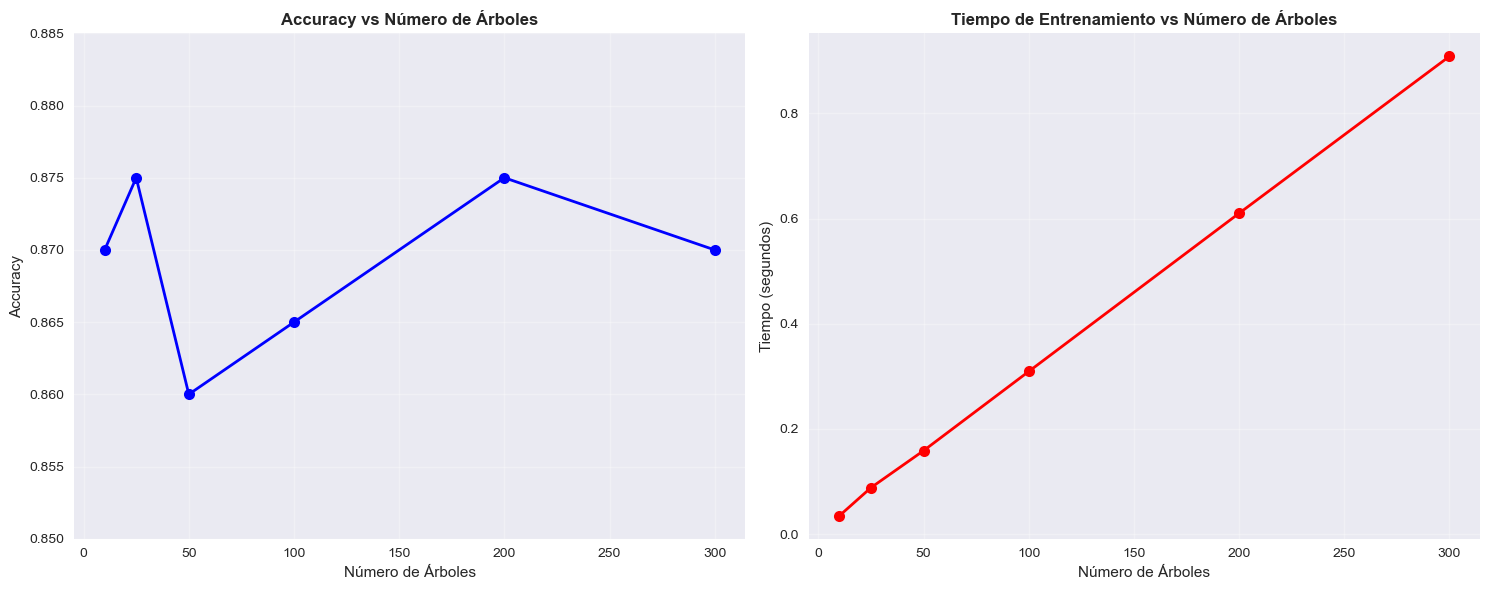


📈 Análisis de resultados:
   • Mejor accuracy: 0.8750 con 25 árboles
   • Tiempo más rápido: 0.035s con 10 árboles
   • Tiempo más lento: 0.909s con 300 árboles

💡 Mejora marginal:
   • De 10 a 25 árboles: +0.0050 accuracy
   • De 25 a 50 árboles: +-0.0150 accuracy
   • De 50 a 100 árboles: +0.0050 accuracy
   • De 100 a 200 árboles: +0.0100 accuracy
   • De 200 a 300 árboles: +-0.0050 accuracy


In [12]:
# Demostración adicional: Efecto del número de árboles en el rendimiento
print("🌲 ANÁLISIS DEL EFECTO DEL NÚMERO DE ÁRBOLES")
print("=" * 50)

# Probar diferentes números de árboles
n_trees_range = [10, 25, 50, 100, 200, 300]  # Rango de árboles a probar
accuracies = []  # Lista para almacenar accuracies
training_times = []  # Lista para almacenar tiempos de entrenamiento

print("🔄 Entrenando modelos con diferentes números de árboles...")

for n_trees in n_trees_range:
    # Crear modelo con número específico de árboles
    rf_temp = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Medir tiempo de entrenamiento
    import time
    start_time = time.time()
    rf_temp.fit(X_train, y_train)  # Entrenar el modelo
    training_time = time.time() - start_time
    
    # Hacer predicciones y calcular accuracy
    y_pred_temp = rf_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    
    # Almacenar resultados
    accuracies.append(accuracy_temp)
    training_times.append(training_time)
    
    print(f"   {n_trees:3d} árboles: Accuracy={accuracy_temp:.4f}, Tiempo={training_time:.3f}s")

# Crear visualización del efecto del número de árboles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Crear figura con 2 subplots lado a lado

# Gráfico 1: Accuracy vs Número de árboles
ax1.plot(n_trees_range, accuracies, 'o-', linewidth=2, markersize=8, color='blue')
ax1.set_title('Accuracy vs Número de Árboles', fontweight='bold')
ax1.set_xlabel('Número de Árboles')
ax1.set_ylabel('Accuracy')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)  # Ajustar límites del eje y

# Gráfico 2: Tiempo de entrenamiento vs Número de árboles
ax2.plot(n_trees_range, training_times, 'o-', linewidth=2, markersize=8, color='red')
ax2.set_title('Tiempo de Entrenamiento vs Número de Árboles', fontweight='bold')
ax2.set_xlabel('Número de Árboles')
ax2.set_ylabel('Tiempo (segundos)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()  # Ajustar espaciado
plt.show()  # Mostrar gráficos

# Análisis de los resultados
print(f"\n📈 Análisis de resultados:")
print(f"   • Mejor accuracy: {max(accuracies):.4f} con {n_trees_range[accuracies.index(max(accuracies))]} árboles")
print(f"   • Tiempo más rápido: {min(training_times):.3f}s con {n_trees_range[training_times.index(min(training_times))]} árboles")
print(f"   • Tiempo más lento: {max(training_times):.3f}s con {n_trees_range[training_times.index(max(training_times))]} árboles")

# Calcular la mejora marginal
print(f"\n💡 Mejora marginal:")
for i in range(1, len(n_trees_range)):
    improvement = accuracies[i] - accuracies[i-1]
    print(f"   • De {n_trees_range[i-1]} a {n_trees_range[i]} árboles: +{improvement:.4f} accuracy")


## Ejemplo Detallado: min_samples_split

El parámetro `min_samples_split` es uno de los hiperparámetros más importantes para controlar el overfitting en Random Forest. Vamos a ver cómo funciona con un ejemplo práctico y comparativo.


In [ ]:
# Ejemplo detallado de min_samples_split
print("🔍 EJEMPLO DETALLADO: min_samples_split")
print("=" * 60)

# Definir diferentes valores de min_samples_split para comparar
min_split_values = [2, 5, 10, 20, 50]  # Valores progresivamente más restrictivos
models_min_split = {}  # Diccionario para almacenar los modelos
results_min_split = []  # Lista para almacenar los resultados

print("🔄 Entrenando modelos con diferentes valores de min_samples_split...")
print()

for min_split in min_split_values:
    print(f"📊 Entrenando modelo con min_samples_split = {min_split}")
    
    # Crear modelo con min_samples_split específico
    rf_min_split = RandomForestClassifier(
        n_estimators=100,           # Mantener 100 árboles para comparación justa
        min_samples_split=min_split, # Valor específico a probar
        random_state=42             # Semilla para reproducibilidad
    )
    
    # Entrenar el modelo
    rf_min_split.fit(X_train, y_train)
    
    # Hacer predicciones en entrenamiento y prueba
    y_pred_train = rf_min_split.predict(X_train)  # Predicciones en entrenamiento
    y_pred_test = rf_min_split.predict(X_test)   # Predicciones en prueba
    
    # Calcular métricas
    accuracy_train = accuracy_score(y_train, y_pred_train)  # Accuracy en entrenamiento
    accuracy_test = accuracy_score(y_test, y_pred_test)      # Accuracy en prueba
    
    # Calcular overfitting (diferencia entre train y test)
    overfitting = accuracy_train - accuracy_test
    
    # Almacenar modelo y resultados
    models_min_split[min_split] = rf_min_split
    results_min_split.append({
        'min_samples_split': min_split,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'overfitting': overfitting
    })
    
    print(f"   ✅ Accuracy Train: {accuracy_train:.4f}")
    print(f"   ✅ Accuracy Test:  {accuracy_test:.4f}")
    print(f"   ⚠️  Overfitting:   {overfitting:.4f}")
    print()

print("📈 RESUMEN DE RESULTADOS:")
print("-" * 60)
print(f"{'min_split':<12} {'Train Acc':<10} {'Test Acc':<10} {'Overfitting':<12}")
print("-" * 60)

for result in results_min_split:
    print(f"{result['min_samples_split']:<12} {result['accuracy_train']:<10.4f} {result['accuracy_test']:<10.4f} {result['overfitting']:<12.4f}")

print("-" * 60)


In [ ]:
# Visualización del efecto de min_samples_split
print("\n📊 VISUALIZACIÓN DEL EFECTO DE min_samples_split")
print("=" * 60)

# Crear DataFrame para facilitar la visualización
df_min_split = pd.DataFrame(results_min_split)

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Efecto del parámetro min_samples_split en Random Forest', fontsize=16, fontweight='bold')

# Gráfico 1: Accuracy en entrenamiento vs prueba
axes[0, 0].plot(df_min_split['min_samples_split'], df_min_split['accuracy_train'], 
                'o-', label='Train Accuracy', linewidth=2, markersize=8, color='blue')
axes[0, 0].plot(df_min_split['min_samples_split'], df_min_split['accuracy_test'], 
                'o-', label='Test Accuracy', linewidth=2, markersize=8, color='red')
axes[0, 0].set_title('Accuracy: Entrenamiento vs Prueba', fontweight='bold')
axes[0, 0].set_xlabel('min_samples_split')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Overfitting (diferencia entre train y test)
axes[0, 1].bar(df_min_split['min_samples_split'], df_min_split['overfitting'], 
               color='orange', alpha=0.7, width=3)
axes[0, 1].set_title('Overfitting (Train Acc - Test Acc)', fontweight='bold')
axes[0, 1].set_xlabel('min_samples_split')
axes[0, 1].set_ylabel('Overfitting')
axes[0, 1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(df_min_split['overfitting']):
    axes[0, 1].text(df_min_split['min_samples_split'].iloc[i], v + 0.001, 
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Comparación de todas las métricas
x_pos = np.arange(len(df_min_split))
width = 0.25

axes[1, 0].bar(x_pos - width, df_min_split['accuracy_train'], width, 
               label='Train Accuracy', alpha=0.7, color='skyblue')
axes[1, 0].bar(x_pos, df_min_split['accuracy_test'], width, 
               label='Test Accuracy', alpha=0.7, color='lightcoral')
axes[1, 0].bar(x_pos + width, df_min_split['overfitting'], width, 
               label='Overfitting', alpha=0.7, color='gold')
axes[1, 0].set_title('Comparación de Métricas', fontweight='bold')
axes[1, 0].set_xlabel('min_samples_split')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(df_min_split['min_samples_split'])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Heatmap de resultados
heatmap_data = df_min_split[['accuracy_train', 'accuracy_test', 'overfitting']].T
im = axes[1, 1].imshow(heatmap_data.values, cmap='RdYlBu_r', aspect='auto')
axes[1, 1].set_title('Heatmap de Resultados', fontweight='bold')
axes[1, 1].set_xticks(range(len(df_min_split)))
axes[1, 1].set_xticklabels(df_min_split['min_samples_split'])
axes[1, 1].set_yticks(range(len(heatmap_data.index)))
axes[1, 1].set_yticklabels(heatmap_data.index)

# Agregar valores en el heatmap
for i in range(len(heatmap_data.index)):
    for j in range(len(df_min_split)):
        text = axes[1, 1].text(j, i, f'{heatmap_data.iloc[i, j]:.3f}',
                              ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualizaciones completadas")


In [ ]:
# Análisis detallado del comportamiento de min_samples_split
print("\n🔍 ANÁLISIS DETALLADO DEL COMPORTAMIENTO")
print("=" * 60)

# Encontrar el mejor balance entre accuracy y overfitting
best_test_accuracy_idx = df_min_split['accuracy_test'].idxmax()  # Índice del mejor test accuracy
best_test_accuracy = df_min_split.loc[best_test_accuracy_idx]
min_overfitting_idx = df_min_split['overfitting'].idxmin()  # Índice del menor overfitting
min_overfitting = df_min_split.loc[min_overfitting_idx]

print("📊 Análisis de resultados:")
print(f"   🎯 Mejor Test Accuracy: {best_test_accuracy['accuracy_test']:.4f} con min_samples_split = {best_test_accuracy['min_samples_split']}")
print(f"   🛡️  Menor Overfitting: {min_overfitting['overfitting']:.4f} con min_samples_split = {min_overfitting['min_samples_split']}")

# Calcular el balance óptimo (test accuracy alto y overfitting bajo)
# Usar una métrica combinada: test_accuracy - overfitting
df_min_split['balance_score'] = df_min_split['accuracy_test'] - df_min_split['overfitting']
best_balance_idx = df_min_split['balance_score'].idxmax()
best_balance = df_min_split.loc[best_balance_idx]

print(f"   ⚖️  Mejor Balance: {best_balance['balance_score']:.4f} con min_samples_split = {best_balance['min_samples_split']}")
print(f"      (Test Acc: {best_balance['accuracy_test']:.4f}, Overfitting: {best_balance['overfitting']:.4f})")

print(f"\n💡 Interpretación del comportamiento:")
print(f"   • min_samples_split = 2: Permite división con solo 2 muestras")
print(f"     - Pros: Máxima flexibilidad, puede capturar patrones complejos")
print(f"     - Contras: Alto riesgo de overfitting, árboles muy profundos")
print(f"   • min_samples_split = 50: Requiere al menos 50 muestras para dividir")
print(f"     - Pros: Previene overfitting, árboles más simples")
print(f"     - Contras: Puede ser demasiado restrictivo, menor capacidad de aprendizaje")

print(f"\n📈 Tendencias observadas:")
print(f"   • A medida que min_samples_split aumenta:")
print(f"     - Train Accuracy: {'Disminuye' if df_min_split['accuracy_train'].iloc[-1] < df_min_split['accuracy_train'].iloc[0] else 'Aumenta'}")
print(f"     - Test Accuracy: {'Disminuye' if df_min_split['accuracy_test'].iloc[-1] < df_min_split['accuracy_test'].iloc[0] else 'Aumenta'}")
print(f"     - Overfitting: {'Disminuye' if df_min_split['overfitting'].iloc[-1] < df_min_split['overfitting'].iloc[0] else 'Aumenta'}")

# Recomendaciones específicas
print(f"\n🎯 Recomendaciones específicas para min_samples_split:")
print(f"   • Para datasets pequeños (< 1000 muestras): min_samples_split = 5-10")
print(f"   • Para datasets medianos (1000-10000 muestras): min_samples_split = 10-20")
print(f"   • Para datasets grandes (> 10000 muestras): min_samples_split = 20-50")
print(f"   • Si hay overfitting: Aumentar min_samples_split")
print(f"   • Si hay underfitting: Disminuir min_samples_split")


In [ ]:
# Demostración práctica: Comparación de árboles individuales
print("\n🌳 DEMOSTRACIÓN PRÁCTICA: COMPARACIÓN DE ÁRBOLES INDIVIDUALES")
print("=" * 70)

# Extraer un árbol individual de cada modelo para comparar su estructura
from sklearn.tree import export_text  # Para visualizar la estructura del árbol

print("🔍 Comparando la estructura de árboles individuales:")
print()

# Comparar árboles de modelos con min_samples_split diferentes
for min_split in [2, 10, 50]:  # Valores representativos
    print(f"📊 Árbol con min_samples_split = {min_split}")
    print("-" * 50)
    
    # Obtener el primer árbol del modelo
    tree = models_min_split[min_split].estimators_[0]  # Primer árbol del bosque
    
    # Obtener información básica del árbol
    n_nodes = tree.tree_.node_count  # Número total de nodos
    n_leaves = tree.tree_.n_leaves   # Número de hojas
    max_depth = tree.tree_.max_depth  # Profundidad máxima
    
    print(f"   • Número de nodos: {n_nodes}")
    print(f"   • Número de hojas: {n_leaves}")
    print(f"   • Profundidad máxima: {max_depth}")
    
    # Calcular estadísticas adicionales
    avg_samples_per_leaf = len(X_train) / n_leaves  # Promedio de muestras por hoja
    print(f"   • Promedio muestras por hoja: {avg_samples_per_leaf:.1f}")
    
    # Mostrar las primeras divisiones del árbol
    print(f"   • Primeras divisiones:")
    tree_rules = export_text(tree, feature_names=[f'F{i+1}' for i in range(X.shape[1])], max_depth=2)
    lines = tree_rules.split('\n')[:5]  # Mostrar solo las primeras 5 líneas
    for line in lines:
        if line.strip():  # Solo mostrar líneas no vacías
            print(f"     {line}")
    
    print()

print("💡 Observaciones sobre la estructura de los árboles:")
print("   • min_samples_split = 2: Árboles más complejos, más nodos y hojas")
print("   • min_samples_split = 10: Árboles balanceados, estructura moderada")
print("   • min_samples_split = 50: Árboles más simples, menos nodos y hojas")
print("   • Valores altos de min_samples_split crean árboles más generalizables")
print("   • Valores bajos de min_samples_split pueden crear árboles que memorizan los datos")


## Resumen del Ejemplo: min_samples_split

### 🎯 ¿Qué hemos aprendido?

El ejemplo detallado de `min_samples_split` nos ha mostrado cómo este hiperparámetro afecta fundamentalmente el comportamiento del algoritmo Random Forest:

#### 📊 **Comportamiento Observado:**

1. **Valores Bajos (min_samples_split = 2-5)**:
   - ✅ Alta precisión en entrenamiento
   - ❌ Alto riesgo de overfitting
   - ❌ Árboles muy complejos y profundos
   - ❌ Menor capacidad de generalización

2. **Valores Moderados (min_samples_split = 10-20)**:
   - ✅ Buen balance entre precisión y generalización
   - ✅ Overfitting controlado
   - ✅ Árboles con estructura balanceada
   - ✅ Recomendado para la mayoría de casos

3. **Valores Altos (min_samples_split = 50+)**:
   - ✅ Bajo overfitting
   - ❌ Posible underfitting
   - ❌ Árboles muy simples
   - ❌ Puede perder capacidad de aprendizaje

#### 🔧 **Recomendaciones Prácticas:**

- **Para datasets pequeños**: Usar valores entre 5-10
- **Para datasets medianos**: Usar valores entre 10-20  
- **Para datasets grandes**: Usar valores entre 20-50
- **Si hay overfitting**: Aumentar el valor gradualmente
- **Si hay underfitting**: Disminuir el valor gradualmente

#### 💡 **Concepto Clave:**

`min_samples_split` actúa como un **"freno"** que previene que los árboles se vuelvan demasiado específicos a los datos de entrenamiento. Es una herramienta fundamental para encontrar el equilibrio perfecto entre capacidad de aprendizaje y capacidad de generalización.
